<a href="https://colab.research.google.com/github/Hriday-A/Electric_car_prediction-/blob/main/OG_data_stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("snakecase", "janitor")) # Install problematic dependency and package first
install.packages(c("tidyverse","lubridate","broom","ggplot2","scales","zoo")) # Install the rest

library(tidyverse)
library(janitor)
library(lubridate)
library(broom)
library(scales)
library(zoo)

# Path to your file (adjust if different)
path <- "/content/Electric_Vehicle_Population_Data (1).csv"

raw <- readr::read_csv(path, show_col_types = FALSE) %>% clean_names()
ev <- raw # Assign raw to ev
names(ev)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: 

[1] "vin_1_10"                                       
 [2] "county"                                         
 [3] "city"                                           
 [4] "state"                                          
 [5] "postal_code"                                    
 [6] "model_year"                                     
 [7] "make"                                           
 [8] "model"                                          
 [9] "electric_vehicle_type"                          
[10] "clean_alternative_fuel_vehicle_cafv_eligibility"
[11] "electric_range"                                 
[12] "base_msrp"                                      
[13] "legislative_district"                           
[14] "dol_vehicle_id"                                 
[15] "vehicle_location"                               
[16] "electric_utility"                               
[17] "x2020_census_tract"

In [ ]:
ev <- ev %>%
  mutate(
    electric_range = case_when(
      make == "LAMBORGHINI" & model == "REVUELTO" & model_year == 2025 ~ 6,
      TRUE ~ electric_range
    )
  )

In [ ]:
ev %>%
  filter(make == "LAMBORGHINI", model == "REVUELTO", model_year == 2025) %>%
  head()

vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ZHWUC1ZM5S,King,Seattle,WA,98125,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,6,NA,46,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000102
ZHWUC1ZM3S,King,Mercer Island,WA,98040,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,6,NA,41,279110842,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024302
ZHWUC1ZM5S,Snohomish,Snohomish,WA,98296,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,6,NA,1,277331204,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,53061052107


In [ ]:
# Print shape before dropping nulls
cat("Shape of DataFrame before dropping nulls:", dim(ev)[1], "rows,", dim(ev)[2], "columns\n")

# Identify null or blank values in county, city, or state
ev <- ev %>%
  mutate(
    county = na_if(county, ""),
    city   = na_if(city, ""),
    state  = na_if(state, "")
  )

null_condition <- is.na(ev$county) | is.na(ev$city) | is.na(ev$state)

# Remove rows with missing county, city, or state
ev_cleaned <- ev[!null_condition, ]

# Print shape after dropping nulls
cat("Shape of DataFrame after dropping nulls:", dim(ev_cleaned)[1], "rows,", dim(ev_cleaned)[2], "columns\n")

# Show first few rows
head(ev_cleaned)

Shape of DataFrame before dropping nulls: 261698 rows, 17 columns
Shape of DataFrame after dropping nulls: 261688 rows, 17 columns


vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
JTDKN3DP2D,Yakima,Yakima,WA,98902,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,15,165252538,POINT (-120.51904 46.59783),PACIFICORP,53077001201
1FMCU0E1XS,Kitsap,Port Orchard,WA,98366,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,26,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,53035092200
JM3KKBHA9R,Kitsap,Kingston,WA,98346,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,23,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,53035090102
7SAYGDEE8P,Thurston,Olympia,WA,98501,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,35,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,53067011821
5YJ3E1EB5K,Thurston,Rainier,WA,98576,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,20,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530
5YJ3E1EA6K,Snohomish,Snohomish,WA,98296,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,44,176340356,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,53061041610


In [ ]:
colSums(is.na(ev_cleaned))

vin_1_10 
                                              0 
                                         county 
                                              0 
                                           city 
                                              0 
                                          state 
                                              0 
                                    postal_code 
                                              0 
                                     model_year 
                                              0 
                                           make 
                                              0 
                                          model 
                                              0 
                          electric_vehicle_type 
                                              0 
clean_alternative_fuel_vehicle_cafv_eligibility 
                                              0 
                                 electric_range 
                                              0 
                                      base_msrp 
                                              3 
                           legislative_district 
                                            618 
                                 dol_vehicle_id 
                                              0 
                               vehicle_location 
                                              8 
                               electric_utility 
                                              0 
                             x2020_census_tract 
                                              0

**Postal code and Legistlative district are 1:1 relationship, hence we will remove the column as it has high null value count and it is of no use **

In [ ]:
ev_clean <- ev_cleaned %>%
  mutate(
    model_year     = as.numeric(model_year),
    electric_range = as.numeric(electric_range),
    county         = str_to_title(county)   # Convert county names to Title Case
  )

In [ ]:
ev_clean

vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
JTDKN3DP2D,Yakima,Yakima,WA,98902,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,15,165252538,POINT (-120.51904 46.59783),PACIFICORP,53077001201
1FMCU0E1XS,Kitsap,Port Orchard,WA,98366,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,26,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,53035092200
JM3KKBHA9R,Kitsap,Kingston,WA,98346,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,23,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,53035090102
7SAYGDEE8P,Thurston,Olympia,WA,98501,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,35,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,53067011821
5YJ3E1EB5K,Thurston,Rainier,WA,98576,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,20,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530
5YJ3E1EA6K,Snohomish,Snohomish,WA,98296,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,44,176340356,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,53061041610
1N4AZ0CP8D,Kitsap,Port Orchard,WA,98367,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,26,134808523,POINT (-122.70348 47.52028),PUGET SOUND ENERGY INC,53035092902
JTJCJMGA1R,Snohomish,Stanwood,WA,98292,2024,LEXUS,RX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,38,256431318,POINT (-122.37265 48.24159),PUGET SOUND ENERGY INC,53061940002
1N4AZ0CP4E,King,Seattle,WA,98144,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11,182508224,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300


In [ ]:
yearly_trend <- ev_clean %>%
  count(model_year, name = "NumberOfVehicles") %>%
  rename(Year = model_year) %>%
  arrange(Year) %>%
  filter(Year != 2025)

# View the result
yearly_trend

Year,NumberOfVehicles
<dbl>,<int>
2000,8
2002,1
2003,1
2008,20
2010,22
2011,631
2012,1440
2013,4081
2014,3326


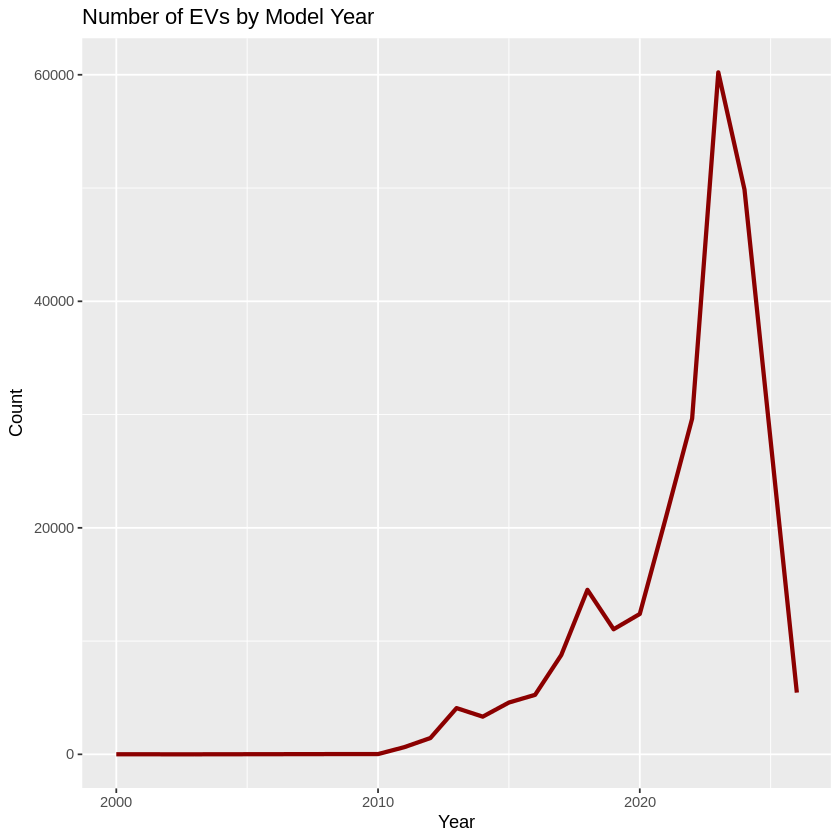

In [ ]:
ggplot(yearly_trend, aes(Year, NumberOfVehicles)) +
  geom_line(linewidth=1.2, color="darkred") +
  labs(title="Number of EVs by Model Year", y="Count")

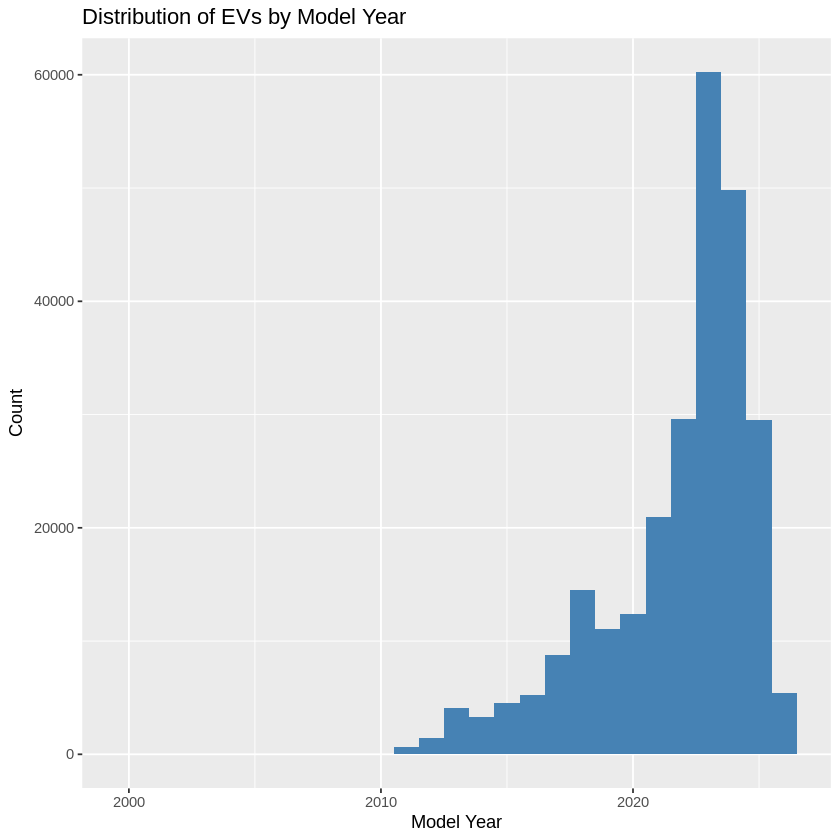

In [ ]:
ggplot(ev_clean, aes(model_year)) +
  geom_histogram(binwidth = 1, fill="steelblue") +
  labs(title="Distribution of EVs by Model Year", x="Model Year", y="Count")

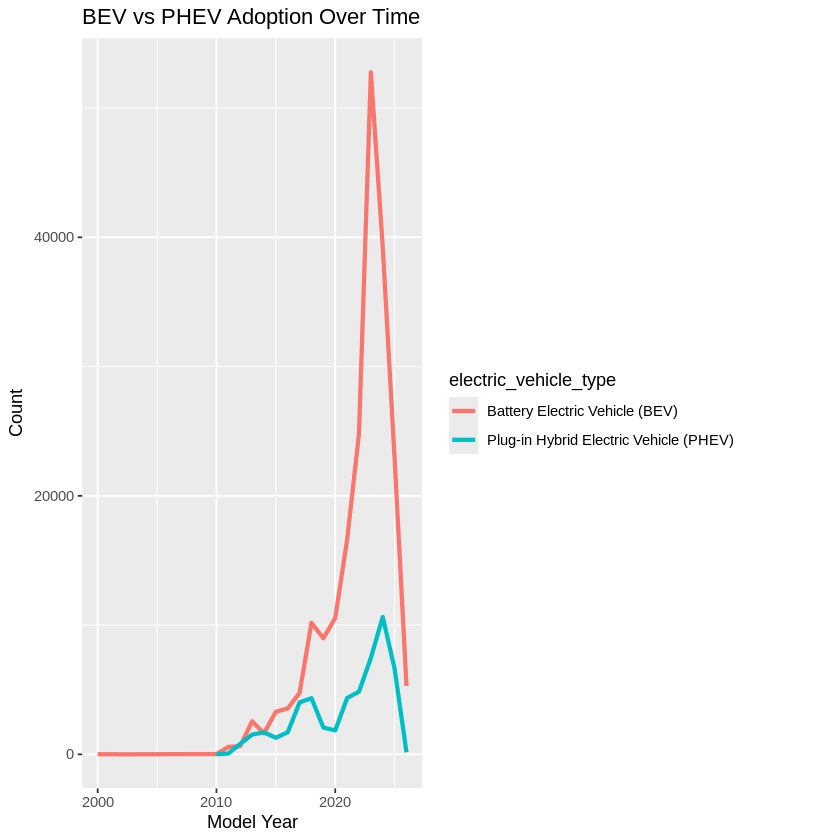

In [ ]:
year_type <- ev_clean %>% count(model_year, electric_vehicle_type)

ggplot(year_type, aes(model_year, n, color = electric_vehicle_type)) +
  geom_line(linewidth=1.2) +
  labs(title="BEV vs PHEV Adoption Over Time", x="Model Year", y="Count")

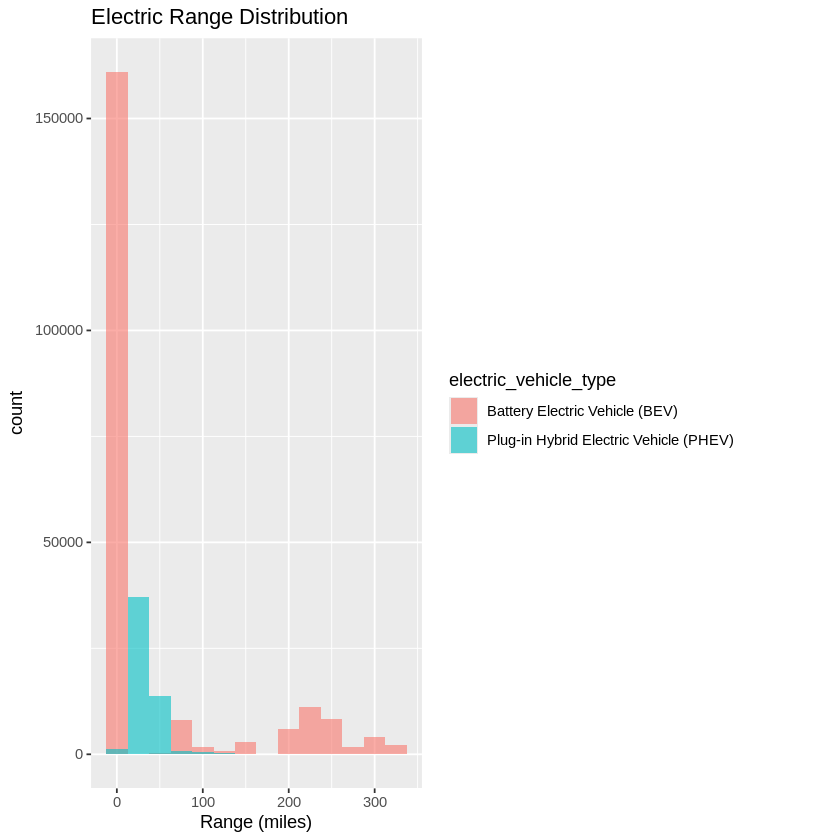

In [ ]:
ggplot(ev_clean, aes(electric_range, fill = electric_vehicle_type)) +
  geom_histogram(alpha=.6, position="identity", binwidth=25) +
  labs(title="Electric Range Distribution", x="Range (miles)")

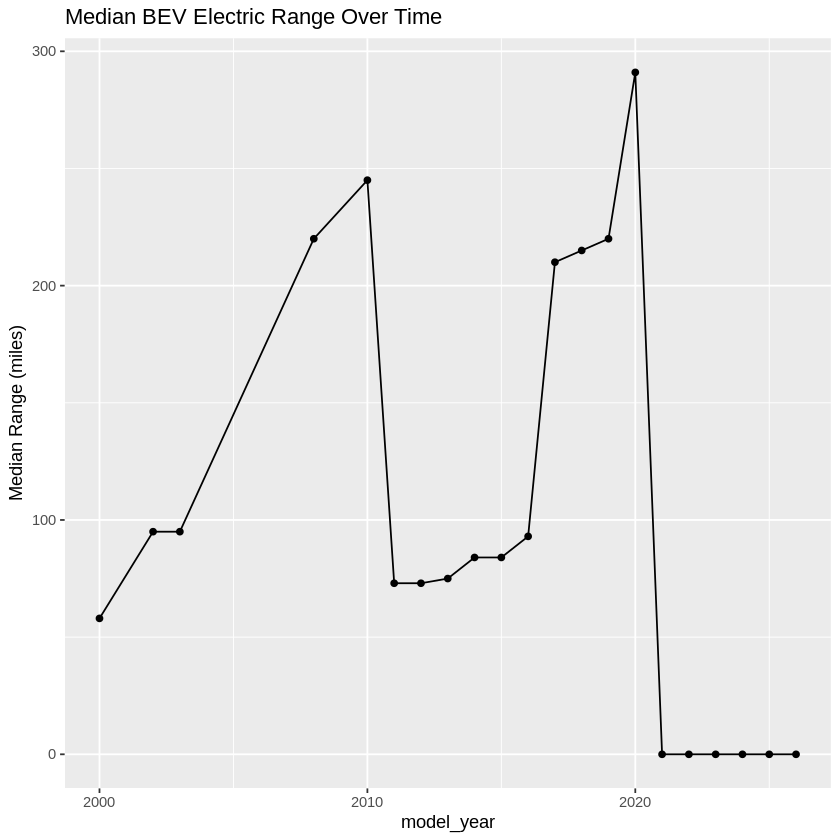

In [ ]:
bev_year_range <- ev_clean %>%
  filter(electric_vehicle_type=="Battery Electric Vehicle (BEV)", !is.na(electric_range)) %>%
  group_by(model_year) %>%
  summarise(median_range = median(electric_range))

ggplot(bev_year_range, aes(model_year, median_range)) +
  geom_point() +
  geom_line() +
  labs(title="Median BEV Electric Range Over Time", y="Median Range (miles)")

electric_vehicle_type,AverageRange
<chr>,<dbl>
Battery Electric Vehicle (BEV),45.45722
Plug-in Hybrid Electric Vehicle (PHEV),31.52994


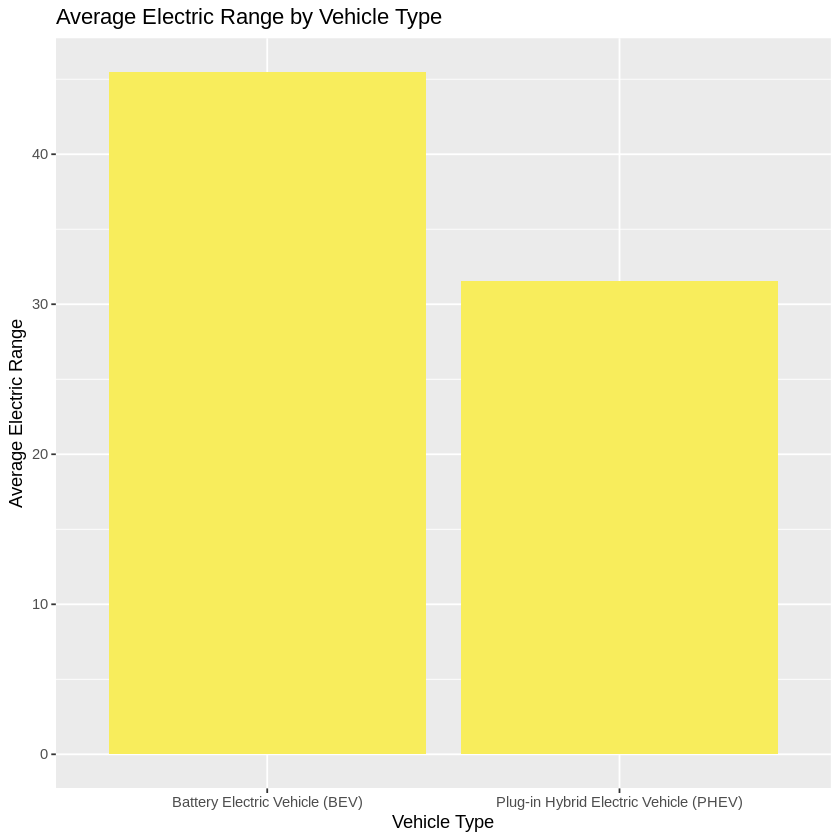

In [ ]:
avg_range_veh <- ev_clean %>%
  group_by(electric_vehicle_type) %>%
  summarise(AverageRange = mean(electric_range, na.rm=TRUE))

avg_range_veh
ggplot(avg_range_veh, aes(x=electric_vehicle_type, y=AverageRange)) +
  geom_col(fill="#f8ed5c") +
  labs(
    title = "Average Electric Range by Vehicle Type",
    x = "Vehicle Type",
    y = "Average Electric Range"
  )

In [ ]:
top_companies <- ev_clean %>%
  count(make, name = "NumberOfVehicles") %>%
  rename(Company = make) %>%
  arrange(desc(NumberOfVehicles)) %>%
  slice(1:10)

top_companies

Company,NumberOfVehicles
<chr>,<int>
TESLA,108771
CHEVROLET,18908
NISSAN,16224
FORD,13987
KIA,12849
TOYOTA,10845
BMW,10808
HYUNDAI,8936
RIVIAN,7932


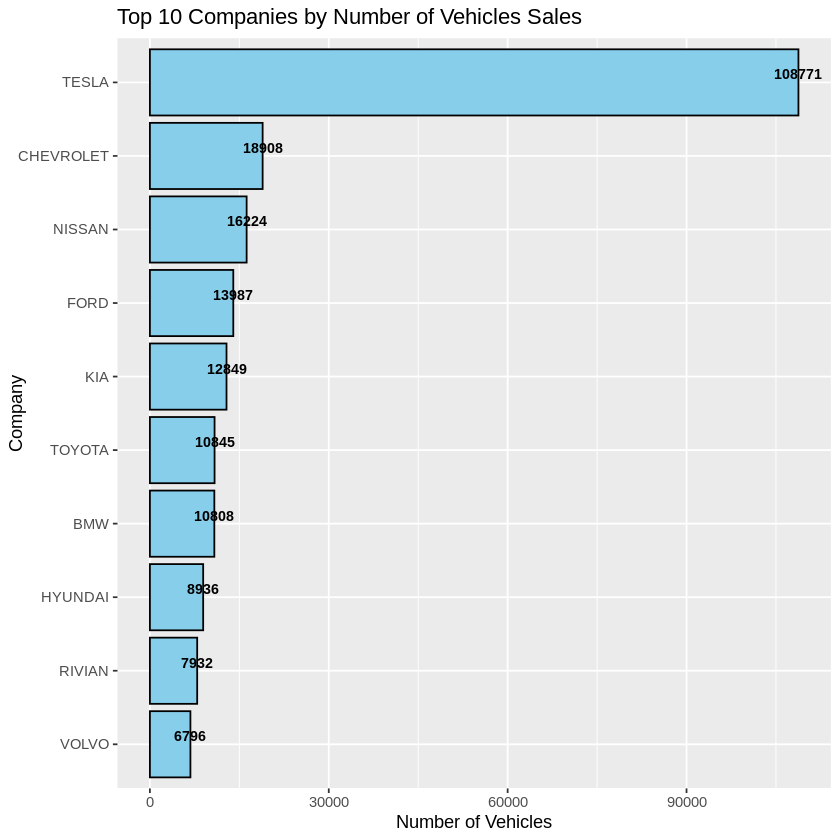

In [ ]:
ggplot(top_companies, aes(x=reorder(Company, NumberOfVehicles),
                          y=NumberOfVehicles)) +
  geom_col(fill="skyblue", color="black") +
  geom_text(aes(label=NumberOfVehicles), vjust=-0.3, fontface="bold", size=3) +
  coord_flip() +
  labs(
    title="Top 10 Companies by Number of Vehicles Sales",
    x="Company",
    y="Number of Vehicles"
  )

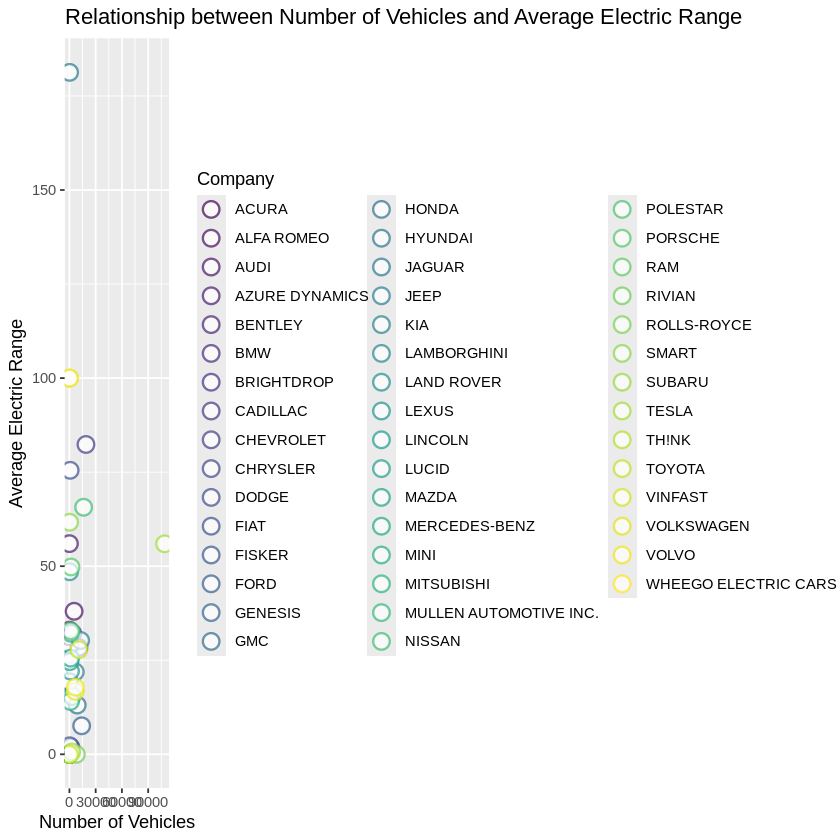

In [ ]:
company_data <- ev_clean %>%
  group_by(make) %>%
  summarise(
    AverageElectricRange = mean(electric_range, na.rm=TRUE),
    NumberOfVehicles = n()
  ) %>%
  rename(Company = make)

ggplot(company_data, aes(NumberOfVehicles, AverageElectricRange,
                          color=factor(Company))) +
  geom_point(size=4, alpha=0.7, stroke=1, shape=21, fill="white") +
  scale_color_viridis_d() +
  labs(
    title = "Relationship between Number of Vehicles and Average Electric Range",
    x="Number of Vehicles",
    y="Average Electric Range",
    color="Company"
  )

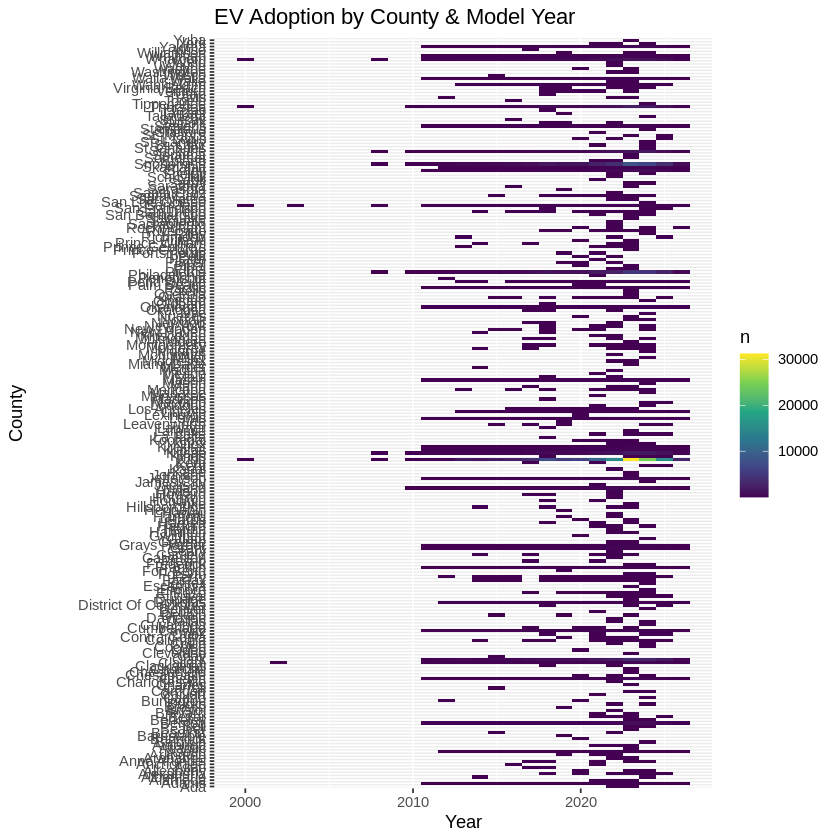

In [ ]:
county_year <- ev_clean %>% count(county, model_year)

ggplot(county_year, aes(model_year, county, fill = n)) +
  geom_tile() +
  scale_fill_viridis_c() +
  labs(title="EV Adoption by County & Model Year", x="Year", y="County")

`geom_smooth()` using formula = 'y ~ x'


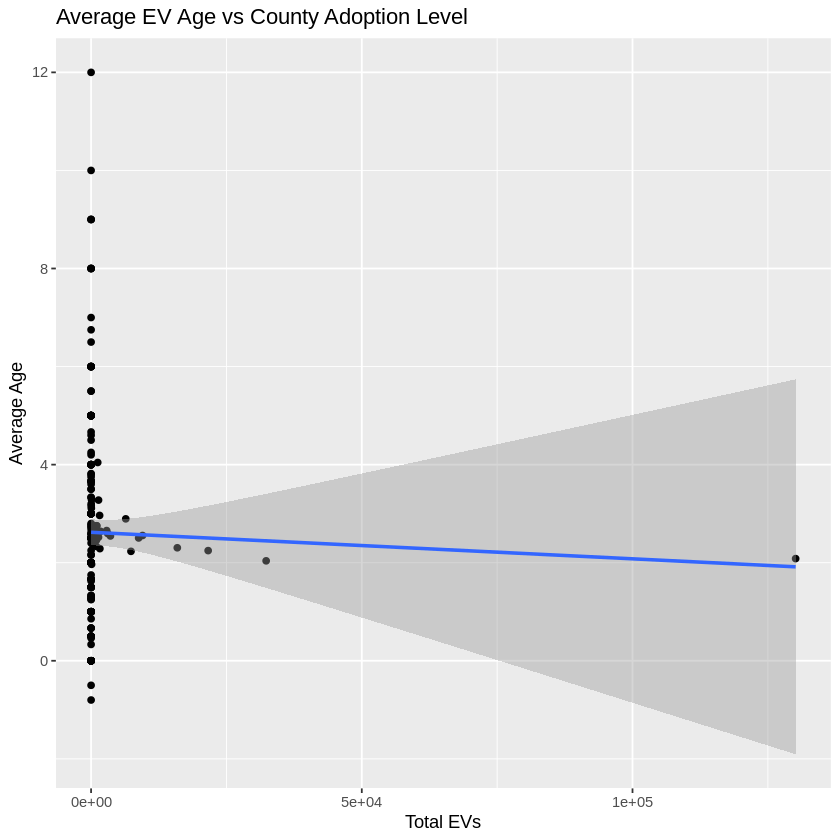

In [ ]:
avg_age_county <- ev_clean %>%
  mutate(vehicle_age = 2024 - model_year) %>%
  group_by(county) %>%
  summarise(avg_age = mean(vehicle_age, na.rm=TRUE),
            total = n())

ggplot(avg_age_county, aes(total, avg_age)) +
  geom_point() +
  geom_smooth(method="lm") +
  labs(title="Average EV Age vs County Adoption Level",
       x="Total EVs", y="Average Age")

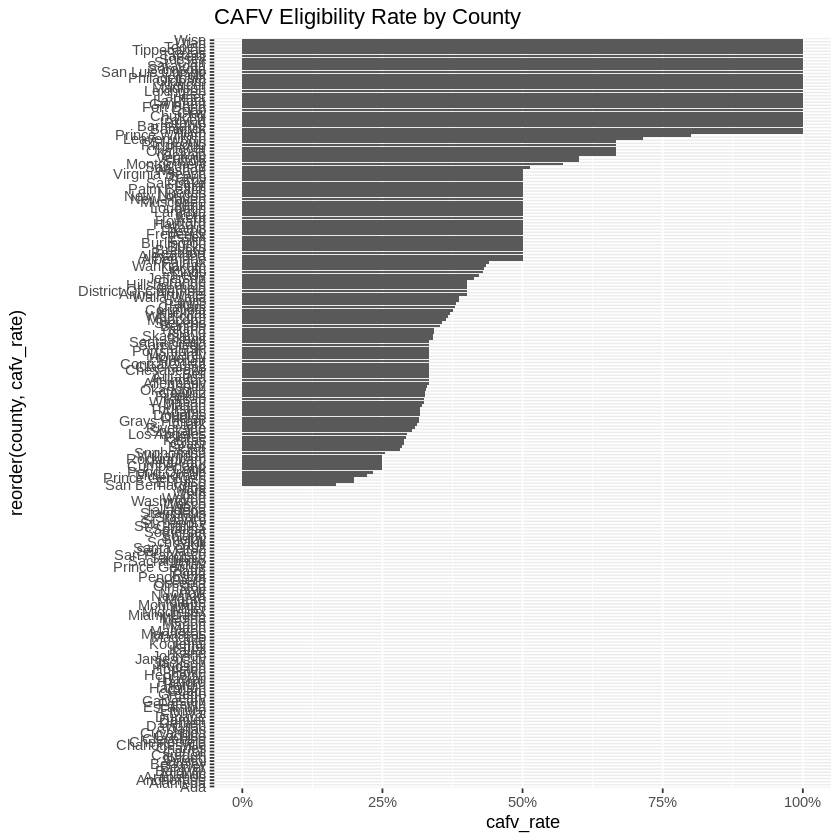

In [ ]:
cafv_county <- ev_clean %>%
  filter(!is.na(clean_alternative_fuel_vehicle_cafv_eligibility)) %>%
  group_by(county) %>%
  summarise(cafv_rate = mean(clean_alternative_fuel_vehicle_cafv_eligibility == "Clean Alternative Fuel Vehicle Eligible"))

ggplot(cafv_county, aes(reorder(county, cafv_rate), cafv_rate)) +
  geom_col() +
  coord_flip() +
  scale_y_continuous(labels=scales::percent) +
  labs(title="CAFV Eligibility Rate by County")

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_col()`).”


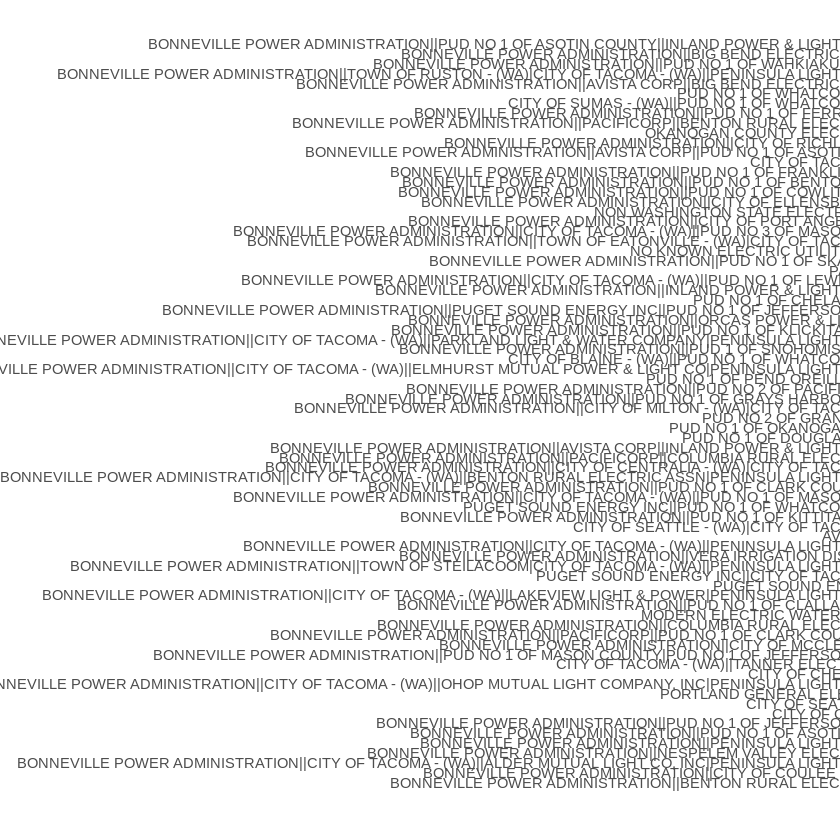

In [ ]:
hi_bev <- ev_clean %>%
  mutate(hi_flag = electric_vehicle_type=="Battery Electric Vehicle (BEV)" & electric_range > 250) %>%
  group_by(electric_utility) %>%
  summarise(
    total_bev = sum(electric_vehicle_type=="Battery Electric Vehicle (BEV)"),
    hi_bev = sum(hi_flag),
    hi_share = hi_bev / total_bev
  )

ggplot(hi_bev, aes(reorder(electric_utility, hi_share), hi_share)) +
  geom_col(fill="darkgreen") +
  coord_flip() +
  scale_y_continuous(labels=scales::percent) +
  labs(title="High-Range (>250 miles) BEV Share by Utility")

In [ ]:
# Perform Label Encoding on high-cardinality features (make, model, county, utility)
dat_labeled <- ev_clean %>%
  mutate(
    # Assigns a unique integer to each unique Make
    make_label = as.numeric(factor(make)),

    # Assigns a unique integer to each unique Model
    model_label = as.numeric(factor(model)),

    # Assigns a unique integer to each unique County
    county_label = as.numeric(factor(county)),

    # Assigns a unique integer to each unique Electric Utility
    utility_label = as.numeric(factor(electric_utility))
  )

# Inspect the result to see the conversion
dat_labeled %>%
  select(make, make_label, model, model_label, county, county_label, electric_utility, utility_label) %>%
  head()

make,make_label,model,model_label,county,county_label,electric_utility,utility_label
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
TOYOTA,42,PRIUS,119,Yakima,234,PACIFICORP,66
FORD,14,ESCAPE,56,Kitsap,106,PUGET SOUND ENERGY INC,74
MAZDA,27,CX-90,40,Kitsap,106,PUGET SOUND ENERGY INC,74
TESLA,40,MODEL Y,106,Thurston,215,PUGET SOUND ENERGY INC,74
TESLA,40,MODEL 3,103,Thurston,215,PUGET SOUND ENERGY INC,74
TESLA,40,MODEL 3,103,Snohomish,197,PUGET SOUND ENERGY INC,74


In [ ]:
library(dplyr)
library(stringr)

# set the "current" year for age calculations
dataset_year <- 2024

ev_fe <- ev_clean %>%
  mutate(
    model_year     = as.integer(model_year),
    electric_range = as.numeric(electric_range),

    # --- Vehicle age ---
    vehicle_age = dataset_year - model_year,

    # --- Range bucket: Low / Medium / High / Unknown ---
    range_bucket = case_when(
      is.na(electric_range)        ~ 0,  # Unknown
      electric_range < 100         ~ 1,  # Low
      electric_range <= 250        ~ 2,  # Medium
      electric_range > 250         ~ 3   # High
    ),

    cafv_clean = case_when(
      clean_alternative_fuel_vehicle_cafv_eligibility ==
        "Clean Alternative Fuel Vehicle Eligible" ~ "eligible",
      clean_alternative_fuel_vehicle_cafv_eligibility ==
        "Not eligible due to low battery range" ~ "non_eligible",
      clean_alternative_fuel_vehicle_cafv_eligibility ==
        "Eligibility unknown as battery range has not been researched" ~
          "eligibility_unknown",
      TRUE ~ "other"
    ),
    cafv_flag = cafv_clean == "eligible",

    ev_type = case_when(
      str_detect(electric_vehicle_type, "BEV")  ~ "BEV",
      str_detect(electric_vehicle_type, "PHEV") ~ "PHEV",
      TRUE                                      ~ "Other"
    ),

    high_range_bev = if_else(
      ev_type == "BEV" &
      !is.na(electric_range) &
      electric_range > 250,
      1L, 0L
    )
  )

In [ ]:
View(ev_fe)

vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,⋯,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract,vehicle_age,range_bucket,cafv_clean,cafv_flag,ev_type,high_range_bev
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>
JTDKN3DP2D,Yakima,Yakima,WA,98902,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,⋯,165252538,POINT (-120.51904 46.59783),PACIFICORP,53077001201,11,1,non_eligible,FALSE,PHEV,0
1FMCU0E1XS,Kitsap,Port Orchard,WA,98366,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,⋯,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,53035092200,-1,1,eligible,TRUE,PHEV,0
JM3KKBHA9R,Kitsap,Kingston,WA,98346,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,⋯,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,53035090102,0,1,non_eligible,FALSE,PHEV,0
7SAYGDEE8P,Thurston,Olympia,WA,98501,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,⋯,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,53067011821,1,1,eligibility_unknown,FALSE,BEV,0
5YJ3E1EB5K,Thurston,Rainier,WA,98576,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,⋯,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530,5,2,eligible,TRUE,BEV,0
5YJ3E1EA6K,Snohomish,Snohomish,WA,98296,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,⋯,176340356,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,53061041610,5,2,eligible,TRUE,BEV,0
1N4AZ0CP8D,Kitsap,Port Orchard,WA,98367,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,⋯,134808523,POINT (-122.70348 47.52028),PUGET SOUND ENERGY INC,53035092902,11,1,eligible,TRUE,BEV,0
JTJCJMGA1R,Snohomish,Stanwood,WA,98292,2024,LEXUS,RX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,⋯,256431318,POINT (-122.37265 48.24159),PUGET SOUND ENERGY INC,53061940002,0,1,eligible,TRUE,PHEV,0
1N4AZ0CP4E,King,Seattle,WA,98144,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,⋯,182508224,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,10,1,eligible,TRUE,BEV,0


In [ ]:
# Research Question 1 Feature Engineering

# County × Year EV count, CAFV participation, avg age, growth, index
county_year_features <- ev_fe %>%
  filter(!is.na(county), !is.na(model_year)) %>%
  group_by(county, model_year) %>%
  summarise(
    ev_count = n(),
    cafv_eligible_count = sum(cafv_flag, na.rm = TRUE),
    cafv_participation_rate = cafv_eligible_count / ev_count,
    avg_vehicle_age_county  = mean(vehicle_age, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(county, model_year) %>%
  group_by(county) %>%
  mutate(
    ev_growth_rate = (ev_count - dplyr::lag(ev_count)) / dplyr::lag(ev_count)
  ) %>%
  ungroup() %>%
  # simple z-score based Green Mobility Index (optional)
  mutate(
    ev_growth_scaled = as.numeric(scale(ev_growth_rate)),
    cafv_rate_scaled = as.numeric(scale(cafv_participation_rate)),
    green_mobility_index = ev_growth_scaled + cafv_rate_scaled
  )


In [ ]:
county_year_features

county,model_year,ev_count,cafv_eligible_count,cafv_participation_rate,avg_vehicle_age_county,ev_growth_rate,ev_growth_scaled,cafv_rate_scaled,green_mobility_index
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ada,2022,1,0,0.00000000,2,NA,NA,-1.13885025,NA
Ada,2023,1,0,0.00000000,1,0.00000000,-0.23050615,-1.13885025,-1.36935640
Adams,2011,1,1,1.00000000,13,NA,NA,1.26748961,NA
Adams,2012,1,1,1.00000000,12,0.00000000,-0.23050615,1.26748961,1.03698346
Adams,2013,1,0,0.00000000,11,0.00000000,-0.23050615,-1.13885025,-1.36935640
Adams,2014,3,2,0.66666667,10,2.00000000,0.52068089,0.46537633,0.98605722
Adams,2015,2,2,1.00000000,9,-0.33333333,-0.35570399,1.26748961,0.91178562
Adams,2016,2,1,0.50000000,8,0.00000000,-0.23050615,0.06431968,-0.16618647
Adams,2017,3,2,0.66666667,7,0.50000000,-0.04270939,0.46537633,0.42266693


In [ ]:
# Research Question 2 Feature Engineering

# Median electric range by model year + YoY (year on year) change
range_by_year <- ev_fe %>%
  filter(!is.na(model_year)) %>%
  group_by(model_year) %>%
  summarise(
    median_electric_range = median(electric_range, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(model_year) %>%
  mutate(
    range_change_yoy = median_electric_range -
      dplyr::lag(median_electric_range)
  )

# Distribution of range buckets by year (for plots)
range_bucket_year <- ev_fe %>%
  filter(!is.na(model_year)) %>%
  group_by(model_year, range_bucket) %>%
  summarise(n = n(), .groups = "drop") %>%
  group_by(model_year) %>%
  mutate(share = n / sum(n)) %>%
  ungroup()


In [ ]:
range_by_year

model_year,median_electric_range,range_change_yoy
<int>,<dbl>,<dbl>
2000,58,NA
2002,95,37
2003,95,0
2008,220,125
2010,245,25
2011,73,-172
2012,35,-38
2013,75,40
2014,72,-3


In [ ]:
# Research Question 3 Feature Engineering

county_age_vs_adoption <- ev_fe %>%
  filter(!is.na(county)) %>%
  group_by(county) %>%
  summarise(
    avg_vehicle_age_county = mean(vehicle_age, na.rm = TRUE),
    ev_count_total         = n(),
    .groups = "drop"
  )
# This is ready for correlations / regressions.

In [ ]:
county_age_vs_adoption

county,avg_vehicle_age_county,ev_count_total
<chr>,<dbl>,<int>
Ada,1.5000000,2
Adams,2.4519231,104
Alameda,1.6250000,8
Albemarle,5.0000000,2
Alexandria,2.0000000,6
Allegheny,1.6666667,3
Allen,6.5000000,2
Anchorage,5.5000000,2
Anne Arundel,2.4000000,10


In [ ]:
# Research Question 4 Feature Engineering

ev_type_by_year <- ev_fe %>%
  filter(!is.na(model_year)) %>%
  group_by(model_year) %>%
  summarise(
    bev_count   = sum(ev_type == "BEV",  na.rm = TRUE),
    phev_count  = sum(ev_type == "PHEV", na.rm = TRUE),
    total_ev    = n(),
    bev_share   = bev_count  / total_ev,
    phev_share  = phev_count / total_ev,
    median_bev_range = median(
      electric_range[ev_type == "BEV"],
      na.rm = TRUE
    ),
    bev_range_x_bev_share = median_bev_range * bev_share,
    .groups = "drop"
  )


In [ ]:
ev_type_by_year

model_year,bev_count,phev_count,total_ev,bev_share,phev_share,median_bev_range,bev_range_x_bev_share
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2000,8,0,8,1.0000000,0.00000000,58,58.00000
2002,1,0,1,1.0000000,0.00000000,95,95.00000
2003,1,0,1,1.0000000,0.00000000,95,95.00000
2008,20,0,20,1.0000000,0.00000000,220,220.00000
2010,20,2,22,0.9090909,0.09090909,245,222.72727
2011,566,65,631,0.8969889,0.10301109,73,65.48019
2012,638,802,1440,0.4430556,0.55694444,73,32.34306
2013,2555,1526,4081,0.6260720,0.37392796,75,46.95540
2014,1625,1701,3326,0.4885749,0.51142514,84,41.04029


In [ ]:
# Research Question 5 Feature Engineering

# Utility-level penetration (overall)
utility_penetration <- ev_fe %>%
  filter(!is.na(electric_utility)) %>%
  group_by(electric_utility) %>%
  summarise(
    total_ev              = n(),
    high_range_bev_count  = sum(high_range_bev, na.rm = TRUE),
    high_range_bev_penetration =
      high_range_bev_count / total_ev,
    .groups = "drop"
  )

# Utility × Year penetration (if you want time dimension)
utility_year_penetration <- ev_fe %>%
  filter(!is.na(electric_utility), !is.na(model_year)) %>%
  group_by(electric_utility, model_year) %>%
  summarise(
    total_ev              = n(),
    high_range_bev_count  = sum(high_range_bev, na.rm = TRUE),
    high_range_bev_penetration =
      high_range_bev_count / total_ev,
    .groups = "drop"
  )


In [ ]:
utility_penetration

electric_utility,total_ev,high_range_bev_count,high_range_bev_penetration
<chr>,<int>,<int>,<dbl>
AVISTA CORP,635,20,0.03149606
"BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC",94,8,0.08510638
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY,4492,170,0.03784506
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||PUD NO 1 OF ASOTIN COUNTY,98,5,0.05102041
BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN,4,0,0.00000000
"BONNEVILLE POWER ADMINISTRATION||BIG BEND ELECTRIC COOP, INC",58,7,0.12068966
BONNEVILLE POWER ADMINISTRATION||CITY OF CENTRALIA - (WA)|CITY OF TACOMA - (WA),301,6,0.01993355
BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA),10,0,0.00000000
BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA),208,11,0.05288462


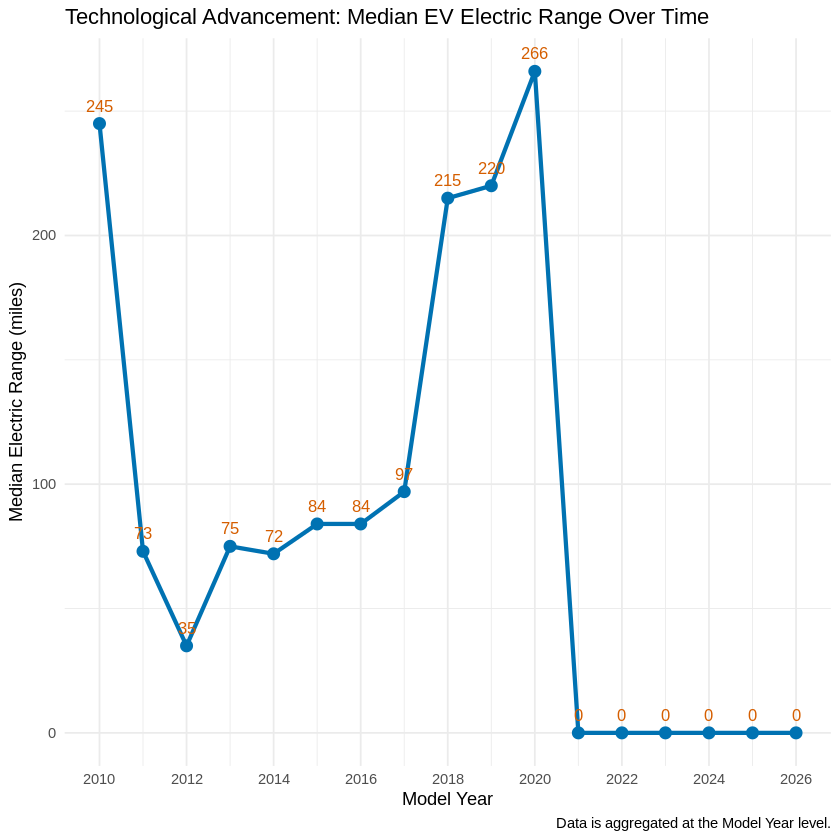

In [ ]:
# Visualize the trend for RQ2: Median Electric Range by Model Year
library(ggplot2)

# Filter for reasonable years (e.g., from 2010 onwards)
range_plot_data <- range_by_year %>%
  filter(model_year >= 2010)

range_plot <- range_plot_data %>%
  ggplot(aes(x = model_year, y = median_electric_range)) +
  # Add the line to show the trend
  geom_line(color = "#0072B2", linewidth = 1.2) +
  # Add points for distinct years
  geom_point(color = "#0072B2", size = 3) +
  # Label the points with the median range value
  geom_text(aes(label = round(median_electric_range)), vjust = -1, size = 3.5, color = "#D55E00") +
  # Title and axis labels
  labs(
    title = "Technological Advancement: Median EV Electric Range Over Time",
    x = "Model Year",
    y = "Median Electric Range (miles)",
    caption = "Data is aggregated at the Model Year level."
  ) +
  # Use a clean, professional theme
  theme_minimal() +
  # Set the x-axis to be yearly integers
  scale_x_continuous(breaks = unique(range_plot_data$model_year)[c(TRUE, FALSE)]) # Show every other year for clarity

print(range_plot)

In [ ]:
# --- ANALYTICAL MODELING FOR RESEARCH QUESTION 1 ---

# Load the 'broom' package for clean model summaries (if not already loaded)
# install.packages("broom")
library(broom)

# 1. Define the Linear Regression Model:
# Y = Green_Mobility_Index
# X = EV_Growth_Scaled + CAFV_Rate_Scaled
rq1_model <- lm(
  green_mobility_index ~ ev_growth_scaled + cafv_rate_scaled,
  data = county_year_features
)

# 2. View the Model Summary
# This provides the coefficient values, standard errors, and significance (p-values)
# The coefficient for each scaled X variable tells you its contribution to the Y variable.
summary(rq1_model)

# 3. Get Tidy Model Output (optional, for easier integration into reports)
tidy(rq1_model)

Warning message in summary.lm(rq1_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = green_mobility_index ~ ev_growth_scaled + cafv_rate_scaled, 
    data = county_year_features)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.433e-15 -7.862e-17 -9.340e-18  1.115e-16  7.845e-16 

Coefficients:
                   Estimate Std. Error    t value Pr(>|t|)    
(Intercept)      -2.926e-18  6.033e-18 -4.850e-01    0.628    
ev_growth_scaled  1.000e+00  6.136e-18  1.630e+17   <2e-16 ***
cafv_rate_scaled  1.000e+00  6.555e-18  1.526e+17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.704e-16 on 795 degrees of freedom
  (236 observations deleted due to missingness)
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.042e+34 on 2 and 795 DF,  p-value: < 2.2e-16


Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.925508e-18,6.032578e-18,-4.849515e-01,0.6278443
ev_growth_scaled,1.000000e+00,6.136142e-18,1.629688e+17,0.0000000
cafv_rate_scaled,1.000000e+00,6.555116e-18,1.525526e+17,0.0000000


In [ ]:
install.packages("rstatix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’





Attaching package: ‘rstatix’


The following object is masked from ‘package:janitor’:

    make_clean_names


The following object is masked from ‘package:stats’:

    filter




[1] "Correlation Test Results (RQ3):"
# A tibble: 1 × 8
  var1                   var2      cor statistic     p conf.low conf.high method
  <chr>                  <chr>   <dbl>     <dbl> <dbl>    <dbl>     <dbl> <chr> 
1 avg_vehicle_age_county ev_co… -0.024    -0.361 0.719   -0.151     0.104 Pears…


`geom_smooth()` using formula = 'y ~ x'


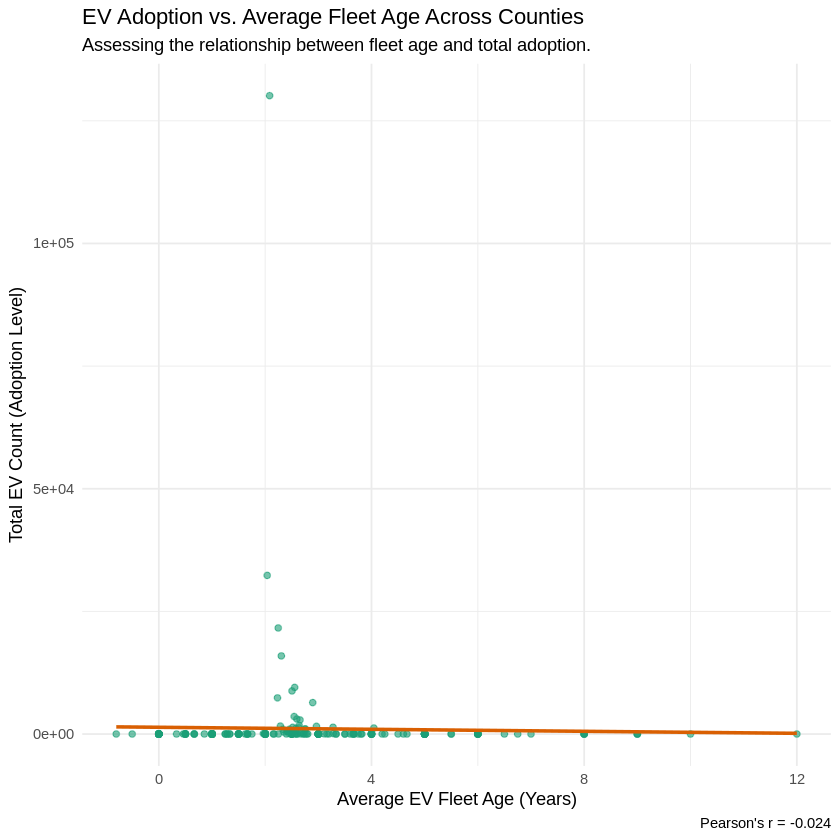

In [ ]:
# --- ANALYTICAL MODELING FOR RESEARCH QUESTION 3 (Correlation and Plot) ---

# Install and load 'rstatix' for easy correlation testing and 'ggplot2' for plotting
# install.packages("rstatix")
library(rstatix)
library(ggplot2)

# 1. Run the Correlation Test
# Pearson correlation test (default) checks for a linear relationship
correlation_test <- county_age_vs_adoption %>%
  cor_test(avg_vehicle_age_county, ev_count_total)

print("Correlation Test Results (RQ3):")
print(correlation_test)


# 2. Visualize the Correlation with a Scatter Plot
# A visual check is essential to ensure the relationship is linear (for Pearson's r)
# and to identify any outliers (like King County) that might skew the results.
correlation_plot <- county_age_vs_adoption %>%
  ggplot(aes(x = avg_vehicle_age_county, y = ev_count_total)) +
  geom_point(alpha = 0.6, color = "#1B9E77") + # Basic scatter plot
  geom_smooth(method = "lm", se = FALSE, color = "#D95F02") + # Add linear trend line
  labs(
    title = "EV Adoption vs. Average Fleet Age Across Counties",
    subtitle = "Assessing the relationship between fleet age and total adoption.",
    x = "Average EV Fleet Age (Years)",
    y = "Total EV Count (Adoption Level)",
    caption = paste("Pearson's r =", round(correlation_test$cor, 3))
  ) +
  theme_minimal()

print(correlation_plot)

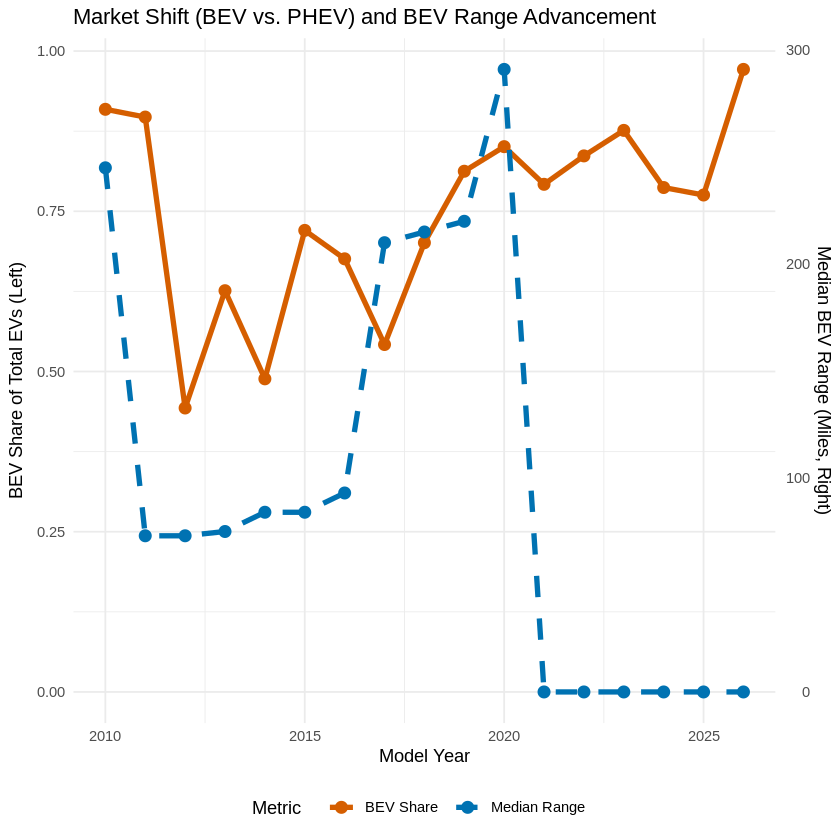

In [ ]:
# --- ANALYTICAL MODELING FOR RESEARCH QUESTION 4 (Dual-Axis Time-Series Plot) ---

library(ggplot2)

# Filter for relevant years and remove NA median ranges
plot_data_rq4 <- ev_type_by_year %>%
  filter(model_year >= 2010, !is.na(median_bev_range))

# 1. Scaling Factor for Dual Axis
# We need to scale the median_bev_range so it can be plotted on the same chart
# as the bev_share (which is between 0 and 1).
# This factor is used to translate the range values to the share scale.
scaling_factor <- max(plot_data_rq4$median_bev_range) / max(plot_data_rq4$bev_share)

# 2. Create the Dual-Axis Plot
rq4_plot <- plot_data_rq4 %>%
  ggplot(aes(x = model_year)) +

  # A. Plot BEV Share (Left Y-axis)
  geom_line(aes(y = bev_share, color = "BEV Share"), linewidth = 1.5) +
  geom_point(aes(y = bev_share, color = "BEV Share"), size = 3) +

  # B. Plot Median BEV Range (Right Y-axis - scaled)
  geom_line(aes(y = median_bev_range / scaling_factor, color = "Median Range"), linetype = "dashed", linewidth = 1.5) +
  geom_point(aes(y = median_bev_range / scaling_factor, color = "Median Range"), size = 3) +

  # 3. Set Scales and Labels
  scale_y_continuous(
    name = "BEV Share of Total EVs (Left)",
    # Secondary axis displays the original range values
    sec.axis = sec_axis(~ . * scaling_factor, name = "Median BEV Range (Miles, Right)")
  ) +
  scale_color_manual(values = c("BEV Share" = "#D55E00", "Median Range" = "#0072B2")) +

  labs(
    title = "Market Shift (BEV vs. PHEV) and BEV Range Advancement",
    x = "Model Year",
    color = "Metric"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

print(rq4_plot)

                 Df Sum Sq  Mean Sq F value Pr(>F)
electric_utility  4 0.0022 0.000545    0.02  0.999
Residuals        85 2.3674 0.027851               

[1] "Tukey's HSD Post-Hoc Test Results:"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = high_range_bev_penetration ~ electric_utility, data = rq5_anova_data)

$electric_utility
                                                                                                                                                          diff
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)-BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY  6.210423e-03
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)-BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                     -1.305837e-03
PUGET SOUND ENERGY INC-BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                           -6.154824e-05
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)-BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              

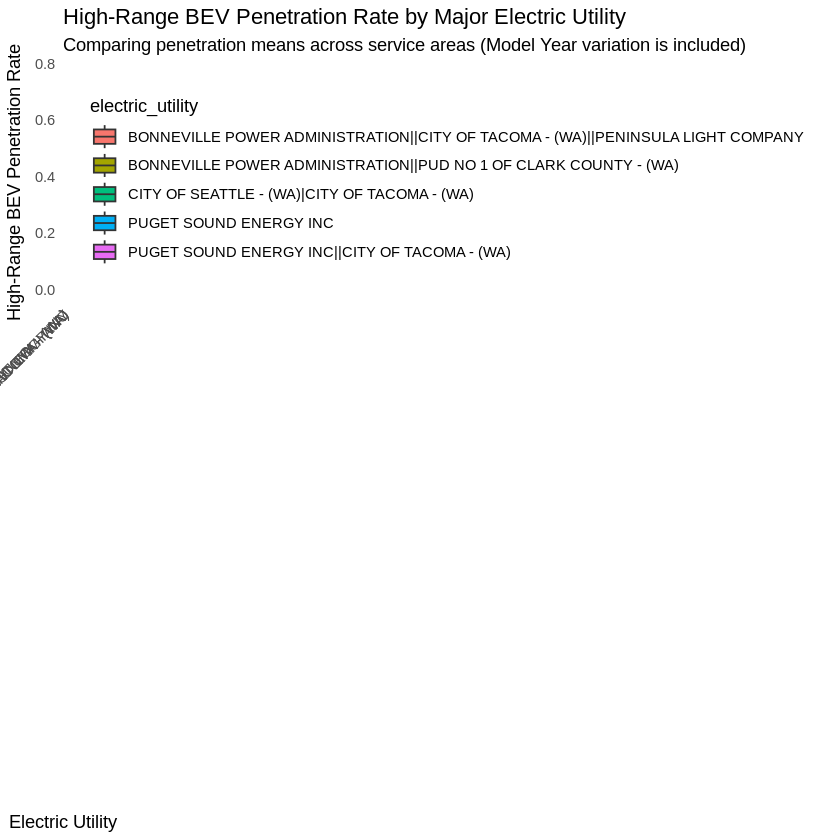

In [ ]:
# --- ANALYTICAL MODELING FOR RESEARCH QUESTION 5 (ANOVA and Boxplot) ---

# 1. Identify Major Utilities
# We filter the utility_penetration summary to find the top 5 utilities by EV count
top_utilities <- utility_penetration %>%
  arrange(desc(total_ev)) %>%
  slice(1:5) %>%
  pull(electric_utility)

# 2. Filter the Time-Series Data to include only the Major Utilities
# This prepares the data for ANOVA, ensuring we compare the major players
rq5_anova_data <- utility_year_penetration %>%
  filter(electric_utility %in% top_utilities)

# 3. Run One-Way ANOVA
# Test if the mean high-range BEV penetration rate differs significantly
# across the top 5 Electric Utility groups.
anova_result <- aov(
  high_range_bev_penetration ~ electric_utility,
  data = rq5_anova_data
)

# View the ANOVA Summary
summary(anova_result)

# 4. Run Post-Hoc Test (Tukey's HSD)
# If the ANOVA is significant, Tukey's HSD tells us WHICH specific utility pairs are different.
# It controls the family-wise error rate.
tukey_hsd_result <- TukeyHSD(anova_result)
print("Tukey's HSD Post-Hoc Test Results:")
print(tukey_hsd_result)


# 5. Visualize the Distribution (Box Plot)
rq5_plot <- rq5_anova_data %>%
  ggplot(aes(x = electric_utility, y = high_range_bev_penetration, fill = electric_utility)) +
  geom_boxplot() +
  labs(
    title = "High-Range BEV Penetration Rate by Major Electric Utility",
    subtitle = "Comparing penetration means across service areas (Model Year variation is included)",
    x = "Electric Utility",
    y = "High-Range BEV Penetration Rate"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels

print(rq5_plot)